Priscila Eowin Bollas Guevara

Introducción

En el ámbito empresarial, el análisis de datos es una herramienta fundamental para la toma de decisiones estratégicas. Uno de los métodos más utilizados para evaluar relaciones entre variables es la regresión lineal, la cual permite modelar y predecir comportamientos a partir de datos históricos.

Este estudio se centra en analizar la relación entre las ganancias de una empresa (Profit) y los gastos administrativos (Administration), con el objetivo de determinar si existe una correlación significativa entre ambas variables. Para ello, se aplican herramientas estadísticas como el coeficiente de correlación de Pearson, el coeficiente de determinación(R2), pruebas de normalidad y homocedasticidad de residuos, así como un análisis de varianza (ANOVA).

Los resultados obtenidos permitirán evaluar si las ganancias de una empresa pueden servir como un predictor confiable de los gastos administrativos, lo que podría ser útil para la planificación financiera y la optimización de recursos en el ámbito corporativo.

Coeficiente de correlación:  0.2007

Coeficiente de determinación:  0.0403

Coeficiente de determinación:  0.0403

Intervalo de confianza para b1 de  95%
-0.0581 < b1 <  0.3371

valor-p de Shapiro:  0.6729

valor_p de Breusch-Pagan:  0.1459

para x = 70, y =  105726
para x = 75, y =  105727
para x = 84, y =  105728



,df,sum_sq,mean_sq,F,PR(>F)
Profit,1.0,1.549639e+09,1.549639e+09,2.01496,0.162217
Residual,48.0,3.691523e+10,7.690672e+08,NaN,NaN


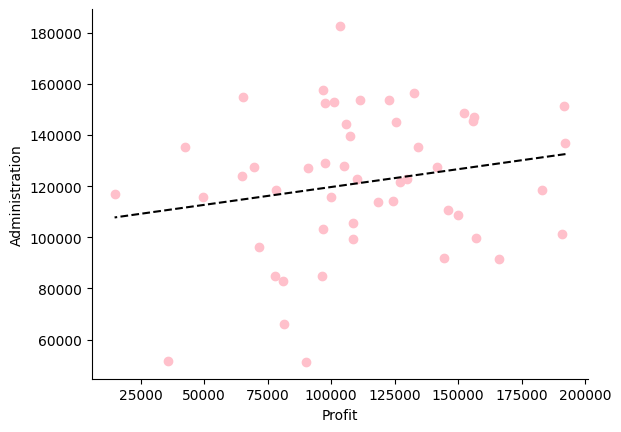

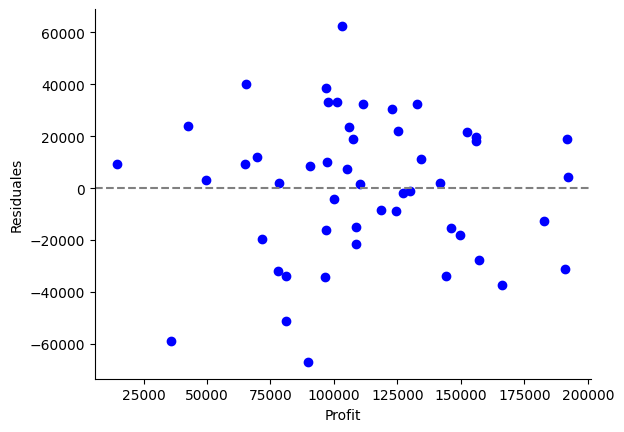

In [45]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Eowin2210/Estadistica-inferencial/refs/heads/main/50_Startups.csv")
df.dropna(inplace = True)

# 1. Establesca una variable dependiente ( Y ) y una variable independiente ( X ).
X = df["Profit"]
Y = df["Administration"]

# 2. Realice un diagrama de dispersión para estos datos.
plt.scatter(X, Y, color = 'pink')
plt.xlabel('Profit')
plt.ylabel('Administration')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 4. Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r, _ = pearsonr(X, Y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
print(f'Coeficiente de determinación: {r ** 2: 0.4f}\n')


# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()

b0, b1 = modelo.params

fun = lambda x: b0 + b1 * x

Yc = fun(X)

plt.plot(X, Yc, color = 'black', linestyle = '--')

from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(Y, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')


# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = 'blue')
plt.xlabel("Profit")
plt.ylabel('Residuales')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y = 0, color = 'gray', linestyle = '--')

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')


# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')


# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
print(f'para x = 70, y = {fun(70): 0.0f}')
print(f'para x = 75, y = {fun(75): 0.0f}')
print(f'para x = 84, y = {fun(84): 0.0f}\n')


# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_2 = ols('Administration ~ Profit', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2)
tabla_anova

Interpretación de Resultados

1. El coeficiente de correlación obtenido fue 𝑟=0.2007. Esto indica una relación positiva pero débil entre la variable independiente (Profit) y la variable dependiente (Administration). En otras palabras, las ganancias de la empresa no explican de manera significativa los gastos administrativos.

2. El coeficiente de determinación fue 
𝑅2 =0.0403 lo que significa que solo el 4.03% de la variabilidad en los gastos administrativos puede ser explicada por las ganancias. Esto sugiere que otros factores, no considerados en este modelo, podrían influir más en los gastos administrativos.

3. Los coeficientes se obtuvieron a través del modelo OLS, pero dado que el intervalo de confianza para 
𝑏1 (-0.0581, 0.3371) incluye el cero, esto indica que el coeficiente no es significativamente distinto de cero. En otras palabras, no hay evidencia fuerte de que Profit tenga un impacto directo sobre Administration.

4. El intervalo de confianza al 95% para la pendiente 
𝑏1 fue (-0.0581, 0.3371). Como incluye el valor 0, no se puede afirmar con certeza que exista una relación significativa entre las variables.

5. Prueba de Shapiro-Wilk: El valor-p fue 0.6729, lo que indica que los residuos siguen una distribución normal y, por lo tanto, no hay evidencia para rechazar la suposición de normalidad.

Prueba de Breusch-Pagan: El valor-p fue 0.1459, lo que sugiere que no hay heterocedasticidad significativa, es decir, la varianza de los residuos es constante.
6. Tabla ANOVA
La prueba ANOVA arrojó un valor de 
𝑝= 0.1622 para la variable Profit, lo que significa que el modelo de regresión no es estadísticamente significativo. En otras palabras, Profit no tiene un impacto fuerte en Administration dentro de este conjunto de datos.

7. Para valores específicos de Profit, los valores esperados de Administration son:

Para X= 70, Y= 105726
Para 𝑋= 75, Y= 105727
Para 𝑋=84,  𝑌= 105728
Estos valores sugieren que la variación en Profit tiene un impacto casi insignificante en Administration, confirmando la debilidad del modelo.



Marco teórico

1. Las estadísticas concluyentes y su aplicación
Las estadísticas concluyentes son el valor básico de la investigación y la toma de decisiones. A diferencia de las estadísticas descriptivas que solo recopilan los datos, las estadísticas concluyentes permiten pronósticos y sacan conclusiones sobre la población de una prueba representativa. Para lograr esto, use métodos como análisis de regresión, pruebas de hipótesis y posibles modelos. 

2. Regresión lineal
La regresión lineal es un método estadístico utilizado para analizar la relación entre las dos variables. Este estudio intenta determinar si existe una relación entre las ganancias de la empresa (ganancias) y los gastos administrativos (administración). La regresión lineal le permite predecir valores y comprender cómo cambia una variable dependiendo de otra. Este método se usa ampliamente en la economía, la economía y las ciencias sociales, ya que ayuda a determinar los modelos y tendencias de datos. El modelo de regresión lineal se considera útil si la relación de las variables es significativa y los datos corresponden a ciertos supuestos estadísticos. 

3. Conexión entre variables
El coeficiente de correlación es una medida que indica la potencia y la dirección de dos relaciones variables. Su valor cambia en el intervalo de -1 a 1. El valor cercano a 1 indica una fuerte obligación positiva cuando una variable aumenta, la otra está cerca de -1 indica una fuerte obligación negativa (cuando una variable aumenta, la otra cae). Si el factor está cerca de 0, esto significa que no hay una conexión clara entre las variables.
En este estudio, el coeficiente de correlación ayuda a determinar si la ganancia de la empresa tiene una relación con los gastos administrativos y en qué medida. 

4. Análisis de residuos
Para que el modelo de regresión sea válido, es necesario analizar los desechos, que es la diferencia entre los valores reales y los valores del modelo proyectados. Un buen modelo debe cumplir ciertas condiciones, como los desechos, generalmente se dividen y sus variaciones son constantes.
Las pruebas estadísticas como la prueba de normalidad de Shapiro-Wilk y Breusch-Pagans se utilizan para evaluar estos aspectos. Si los desechos cumplen con estos criterios, el modelo puede considerarse pronósticos confiables.

5. Análisis de dispersión (ANOVA)
El análisis de dispersión (ANOVA) es una técnica estadística utilizada para determinar si las diferencias entre los grupos de datos son significativas. En relación con la regresión, el ANOVA le permite evaluar si la variable independiente realmente afecta la variable dependiente o si la relación observada es un producto aleatorio. Si el análisis ANOV indica que la relación es importante, se puede concluir que la variable independiente afecta a lo dependiente. Si esto no es importante, significa que otros factores pueden afectar la variable de interés. 

Metodología

1. Selección de datos
Se utilizó un conjunto de datos de startups, disponible en un archivo CSV, con información sobre administración, ganancias y otros factores relevantes para el análisis. Se realizó un preprocesamiento eliminando valores nulos para garantizar la calidad de los datos.

2. Definición de variables
*Variable dependiente (Y): Administración (Administration).
*Variable independiente (X): Ganancias (Profit).
3. Análisis exploratorio de datos
Se generó un diagrama de dispersión para observar la relación entre las variables y verificar si cumplen con la suposición de linealidad.

4. Cálculo de coeficientes estadísticos
*Coeficiente de correlación de Pearson: Se calculó para medir la relación entre las variables.
*Coeficiente de determinación (R²): Se calculó para evaluar la proporción de variabilidad explicada por el modelo de regresión.

5. Ajuste de la regresión lineal
Se utilizó el método de Mínimos Cuadrados Ordinarios (OLS) para obtener la ecuación de la recta de regresión ajustada.

6. Evaluación del modelo
Intervalo de confianza: Se calculó un intervalo del 95% para la pendiente de la recta de regresión.
Análisis de residuos: Se analizaron los residuos para verificar supuestos de normalidad y homocedasticidad mediante:
*Prueba de Shapiro-Wilk.
*Prueba de Breusch-Pagan.

7. Predicción
Se realizaron predicciones utilizando la ecuación de la recta de regresión ajustada para valores específicos de la variable independiente.

8. Análisis de varianza (ANOVA)
Se realizó una tabla ANOVA para evaluar la significancia del modelo.

Conclusión

El análisis estadístico realizado indica que la relación entre las ganancias (Profit) y los gastos administrativos (Administration) es débil y no significativa. El coeficiente de correlación obtenido (r=0.2007) sugiere que, aunque existe una ligera relación positiva, esta no es lo suficientemente fuerte como para ser considerada relevante.

Además, el coeficiente de determinación (R2 =0.0403) muestra que solo un 4.03% de la variabilidad en los gastos administrativos puede ser explicada por las ganancias, lo que implica que existen otros factores más influyentes en la determinación de estos costos.

El análisis de residuos confirma que el modelo cumple con los supuestos de normalidad y homocedasticidad, pero la prueba ANOVA indica que la variable Profit no es un predictor significativo de Administration.

En conclusión, los resultados sugieren que las ganancias de la empresa no son un factor determinante en la variación de los gastos administrativos. Para un análisis más completo, se recomienda incluir otras variables que puedan influir en estos costos, como el tamaño de la empresa, el sector de la industria y las estrategias de gestión administrativa.